In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
# df=pd.read_csv("https://drive.google.com/uc?export=download&id=1VPxzUTFNJEy-vQxCctu3YLkKQDl1RbMB")
# df.head(5)
df = pd.read_csv("/content/DNP3_IDS_Dataset_unsampled.csv")

In [ ]:
df.dtypes

flow ID                     object
 source IP                  object
 destination IP             object
 source port               float64
 destination port          float64
                            ...   
 deviceTroubleFragments    float64
 deviceRestartFragments    float64
 pktsFromMASTER            float64
 pktsFromSLAVE             float64
Label                       object
Length: 101, dtype: object

In [ ]:
# Preprocessing Phase 0
# Formatting and stripping df col names
df.columns = df.columns.\
    str.strip().\
    str.lower()

In [ ]:
# Preprocessing Phase 1
# Converting IPs to Numeric Format

def to_numeric(s):
    try:
        s = ''.join(filter(str.isdigit, s))
        return int(s)
    except:
        return s  # error case

for col in ["flow id", "source ip", "destination ip", "date"]:
            if col in df.columns:
                df[col] = df[col].astype(str).apply(to_numeric)


In [ ]:
df.head()

,flow id,source ip,destination ip,source port,destination port,protocol,date,duration,totalfwdpkts,totalbwdpkts,...,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,corruptconfigfragments,devicetroublefragments,devicerestartfragments,pktsfrommaster,pktsfromslave,label
0,192168112192168155755820003,192168112,19216815,57558.0,20003.0,6.0,19052020112001,238262788.0,125.0,127.0,...,252.0,MASTER,1.0,129.0,0.0,0.0,0.0,125.0,127.0,STOP_APP
1,192168112192168155755820003,192168112,19216815,57558.0,20003.0,6.0,19052020112401,238455999.0,124.0,128.0,...,252.0,MASTER,1.0,129.0,0.0,0.0,0.0,124.0,128.0,STOP_APP
2,192168112192168155755820003,192168112,19216815,57558.0,20003.0,6.0,19052020112801,238786679.0,124.0,128.0,...,252.0,MASTER,1.0,129.0,0.0,0.0,0.0,124.0,128.0,STOP_APP
3,192168112192168155755820003,192168112,19216815,57558.0,20003.0,6.0,19052020113202,238903727.0,124.0,128.0,...,252.0,MASTER,1.0,129.0,0.0,0.0,0.0,124.0,128.0,STOP_APP
4,192168112192168155755820003,192168112,19216815,57558.0,20003.0,6.0,19052020113603,238701663.0,124.0,128.0,...,252.0,MASTER,1.0,129.0,0.0,0.0,0.0,124.0,128.0,STOP_APP


In [ ]:
df.dtypes

flow id                    object
source ip                  object
destination ip             object
source port               float64
destination port          float64
                           ...   
devicetroublefragments    float64
devicerestartfragments    float64
pktsfrommaster            float64
pktsfromslave             float64
label                      object
Length: 101, dtype: object

In [ ]:
# Preprocessing Phase 2
# In Label Column, IN  firstPacketDIR
df['label'] = df['label'].replace({
    'NORMAL': 0,
    'COLD_RESTART': 1,
    'WARM_RESTART': 2,
    'DISABLE_UNSOLICITED': 3,
    'DNP3_ENUMERATE':4,
    'DNP3_INFO': 5,
    'INIT_DATA':6,
    'REPLAY':7,
    'STOP_APP':8
    })
df['firstpacketdir'] = df['firstpacketdir'].replace({'MASTER': 0, 'OUTSTATION': 1})


In [ ]:
df.dtypes

flow id                    object
source ip                  object
destination ip             object
source port               float64
destination port          float64
                           ...   
devicetroublefragments    float64
devicerestartfragments    float64
pktsfrommaster            float64
pktsfromslave             float64
label                     float64
Length: 101, dtype: object

In [ ]:
df.isnull()

,flow id,source ip,destination ip,source port,destination port,protocol,date,duration,totalfwdpkts,totalbwdpkts,...,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,corruptconfigfragments,devicetroublefragments,devicerestartfragments,pktsfrommaster,pktsfromslave,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306776,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
306777,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
306778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
306779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['flow id'] = df['flow id'].astype('str')
df['source ip'] = df['source ip'].astype('str')
df['destination ip'] = df['destination ip'].astype('str')
df['date'] = df['date'].astype('str')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['flow id'] = label_encoder.fit_transform(df['flow id'])
df['source ip'] = label_encoder.fit_transform(df['source ip'])
df['destination ip'] = label_encoder.fit_transform(df['destination ip'])
df['date'] = label_encoder.fit_transform(df['date'])

In [ ]:
df.dtypes

flow id                     int64
source ip                   int64
destination ip              int64
source port               float64
destination port          float64
                           ...   
devicetroublefragments    float64
devicerestartfragments    float64
pktsfrommaster            float64
pktsfromslave             float64
label                     float64
Length: 101, dtype: object

In [ ]:
print(df.select_dtypes(include=['object']))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[306781 rows x 0 columns]


In [ ]:
# Preprocessing Phase 4
# Apply variance threshold to remove features with 0 variance
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)
const_features = [column for column in df.columns if column not in df.columns[var_thres.get_support()]]
print(f"{len(const_features)} are constant. Named as {const_features}")


3 are constant. Named as ['protocol', 'corruptconfigfragments', 'devicerestartfragments']


In [ ]:
df = df.drop(['protocol', 'corruptconfigfragments', 'devicerestartfragments'], axis=1)

In [ ]:
df = df.dropna()

NameError: name 'df' is not defined

In [ ]:
df.shape

(241311, 98)

In [ ]:
df.to_csv("DNP3_final.csv")

In [ ]:
df = pd.read_csv("/content/DNP3_final.csv")

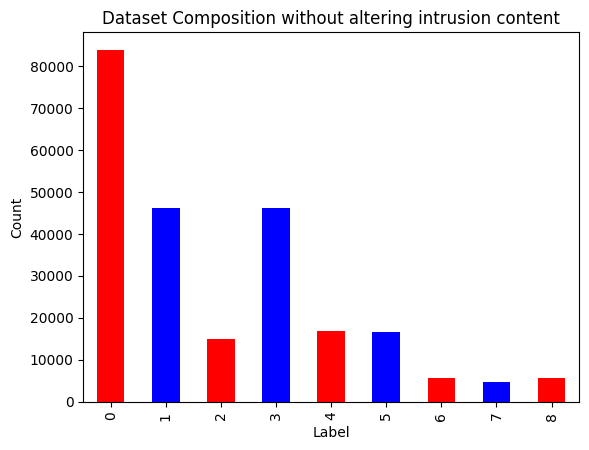

In [ ]:
import matplotlib.pyplot as plt
df.groupby('label').size().plot(kind='bar', color=['red','blue'], xlabel='Label', ylabel='Count')
plt.title('Dataset Composition without altering intrusion content')
plt.show()

In [ ]:
df.shape

(241311, 98)

## Adding ANN and CNN

In [ ]:
# Adding ANN and CNN

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/DNP3_final.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241311 entries, 0 to 241310
Data columns (total 98 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   flow id                   241311 non-null  int64  
 1   source ip                 241311 non-null  int64  
 2   destination ip            241311 non-null  int64  
 3   source port               241311 non-null  int64  
 4   destination port          241311 non-null  int64  
 5   date                      241311 non-null  int64  
 6   duration                  241311 non-null  int64  
 7   totalfwdpkts              241311 non-null  int64  
 8   totalbwdpkts              241311 non-null  int64  
 9   totlenfwddl               241311 non-null  int64  
 10  totlenfwdtr               241311 non-null  int64  
 11  totlenfwdapp              241311 non-null  int64  
 12  totlenbwddl               241311 non-null  int64  
 13  totlenbwdtr               241311 non-null  i

In [ ]:
df.head()

,Unnamed: 0,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,...,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave,label
0,0,3381,4,8,57558.0,20003.0,17847,238262788.0,125.0,127.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,125.0,127.0,8.0
1,1,3381,4,8,57558.0,20003.0,17873,238455999.0,124.0,128.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
2,2,3381,4,8,57558.0,20003.0,17896,238786679.0,124.0,128.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
3,3,3381,4,8,57558.0,20003.0,17922,238903727.0,124.0,128.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
4,4,3381,4,8,57558.0,20003.0,17948,238701663.0,124.0,128.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0


In [ ]:
print(df['label'].unique())
print(df['label'].value_counts())

[8 0 1 4 5 6 7 3 2]
0    83848
1    46224
3    46224
4    16900
5    16710
2    15024
8     5772
6     5772
7     4837
Name: label, dtype: int64


In [ ]:
print(df['label'].isna().sum())

1


In [ ]:
df.tail() # Last Row was causing issue

,Unnamed: 0,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,...,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave,label
32884,42484,2020,1,6,40709.0,20001.0,5232,239122252.0,133.0,137.0,...,2.0,11.0,270.0,0.0,1.0,129.0,0.0,133.0,137.0,1.0
32885,42485,2273,4,6,46578.0,20003.0,5233,238124209.0,132.0,136.0,...,4.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0,1.0
32886,42486,8,3,6,51222.0,20002.0,5296,238109607.0,132.0,136.0,...,3.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0,1.0
32887,42487,3407,5,6,54543.0,20000.0,5297,238124920.0,124.0,128.0,...,1.0,11.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,0.0
32888,42488,2020,1,6,40709.0,20001.0,5298,238126894.0,131.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(df.index[-1])
df.tail()

,Unnamed: 0,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,...,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave,label
32883,42483,3407,5,6,54543.0,20000.0,5231,238120019.0,124.0,128.0,...,1.0,11.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,0.0
32884,42484,2020,1,6,40709.0,20001.0,5232,239122252.0,133.0,137.0,...,2.0,11.0,270.0,0.0,1.0,129.0,0.0,133.0,137.0,1.0
32885,42485,2273,4,6,46578.0,20003.0,5233,238124209.0,132.0,136.0,...,4.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0,1.0
32886,42486,8,3,6,51222.0,20002.0,5296,238109607.0,132.0,136.0,...,3.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0,1.0
32887,42487,3407,5,6,54543.0,20000.0,5297,238124920.0,124.0,128.0,...,1.0,11.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,0.0


In [ ]:
print(df['label'].unique())
print(df['label'].value_counts())
print(df['label'].isna().sum())

df = df.drop(columns='Unnamed: 0')


[8. 0. 1.]
1.0    14725
0.0    12391
8.0     5772
Name: label, dtype: int64
0


In [ ]:
df

,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,totlenfwddl,...,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave,label
0,3381,4,8,57558.0,20003.0,17847,238262788.0,125.0,127.0,1045.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,125.0,127.0,8.0
1,3381,4,8,57558.0,20003.0,17873,238455999.0,124.0,128.0,1028.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
2,3381,4,8,57558.0,20003.0,17896,238786679.0,124.0,128.0,1028.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
3,3381,4,8,57558.0,20003.0,17922,238903727.0,124.0,128.0,1028.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
4,3381,4,8,57558.0,20003.0,17948,238701663.0,124.0,128.0,1028.0,...,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32883,3407,5,6,54543.0,20000.0,5231,238120019.0,124.0,128.0,1028.0,...,1.0,11.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0,0.0
32884,2020,1,6,40709.0,20001.0,5232,239122252.0,133.0,137.0,1073.0,...,2.0,11.0,270.0,0.0,1.0,129.0,0.0,133.0,137.0,1.0
32885,2273,4,6,46578.0,20003.0,5233,238124209.0,132.0,136.0,1068.0,...,4.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0,1.0
32886,8,3,6,51222.0,20002.0,5296,238109607.0,132.0,136.0,1068.0,...,3.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X= df.drop(columns='label')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=21)

In [ ]:
X

,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,totlenfwddl,...,idlemin,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave
0,3381,4,8,57558.0,20003.0,17847,238262788.0,125.0,127.0,1045.0,...,0.0,4.0,13.0,252.0,0.0,1.0,129.0,0.0,125.0,127.0
1,3381,4,8,57558.0,20003.0,17873,238455999.0,124.0,128.0,1028.0,...,0.0,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0
2,3381,4,8,57558.0,20003.0,17896,238786679.0,124.0,128.0,1028.0,...,0.0,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0
3,3381,4,8,57558.0,20003.0,17922,238903727.0,124.0,128.0,1028.0,...,0.0,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0
4,3381,4,8,57558.0,20003.0,17948,238701663.0,124.0,128.0,1028.0,...,0.0,4.0,13.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32883,3407,5,6,54543.0,20000.0,5231,238120019.0,124.0,128.0,1028.0,...,0.0,1.0,11.0,252.0,0.0,1.0,129.0,0.0,124.0,128.0
32884,2020,1,6,40709.0,20001.0,5232,239122252.0,133.0,137.0,1073.0,...,0.0,2.0,11.0,270.0,0.0,1.0,129.0,0.0,133.0,137.0
32885,2273,4,6,46578.0,20003.0,5233,238124209.0,132.0,136.0,1068.0,...,0.0,4.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0
32886,8,3,6,51222.0,20002.0,5296,238109607.0,132.0,136.0,1068.0,...,0.0,3.0,11.0,268.0,0.0,1.0,129.0,0.0,132.0,136.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Bidirectional, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

label_encoder = LabelEncoder()

trainY = tensorflow.keras.utils.to_categorical(label_encoder.fit_transform(y_train), num_classes=9)
testY = tensorflow.keras.utils.to_categorical(label_encoder.transform(y_test), num_classes=9)


# X_train,X_test,y_train,y_test

# Simple ANN

layers = [
    Dense(units=X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
      Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
        Dropout(0.2),
    Dense(units=21, activation='relu'),
    Dense(units=9, activation='softmax')
]

model = Sequential(layers)

model.compile(optimizer=opt, loss='categorical_crossentropy')

model.summary()

model.fit(X_train, trainY, epochs=10, batch_size=128, validation_split=0.1)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(testY, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
print("F1-score:", f1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 97)                9506      
                                                                 
 dense_6 (Dense)             (None, 64)                6272      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 21)                693       
                                                                 
 dense_9 (Dense)             (None, 9)                 198       
                                                                 
Total params: 18749 (73.24 KB)
Trainable params: 18749

In [ ]:
df.head()

,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,totlenfwddl,...,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave,label
0,3381,4,8,57558,20003,17847,238262788,125,127,1045,...,4,13,252,0,1,129,0,125,127,8
1,3381,4,8,57558,20003,17873,238455999,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
2,3381,4,8,57558,20003,17896,238786679,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
3,3381,4,8,57558,20003,17922,238903727,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
4,3381,4,8,57558,20003,17948,238701663,124,128,1028,...,4,13,252,0,1,129,0,124,128,8


In [ ]:
#CNN Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
opt = Adam(learning_rate=0.0001)


# X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

model2 = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=9, activation='softmax')
])




model2 = Sequential(layers)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()
model2.fit(X_train, trainY, epochs=5, batch_size=128, validation_split=0.2)



y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(testY, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
print("F1-score:", f1)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 97)                9506      
                                                                 
 dense_6 (Dense)             (None, 64)                6272      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 21)                693       
                                                                 
 dense_9 (Dense)             (None, 9)                 198       
                                                                 
Total params: 18749 (73.24 KB)
Trainable params: 18749

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
# Splitting Data into Training and Testing Sets
X= df.drop(columns='label')
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
# def run_algos(X_train, y_train):
#     accuracies = {}
#     n_timesteps = X_train.shape[0]
#     n_features = X_train.shape[1]

#     models = {
#         'Decision Tree': DecisionTreeClassifier(),
#         'Random Forest': RandomForestClassifier(),
#         'XGBoost': XGBClassifier(),
#         # 'CNNs': Sequential([
#         #     Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(n_timesteps, n_features)),
#         #     Conv2D(64, (3, 3), activation='relu'),
#         #     Flatten(),
#         #     Dense(128, activation='relu'),
#         #     Dense(10, activation='softmax')
#         # ]),
#         'LSTMs': Sequential([
#             LSTM(50, input_shape=(n_timesteps, n_features)),
#             Dense(1, activation='sigmoid')
#         ]),
#         'RNNs': Sequential([
#             SimpleRNN(50, input_shape=(n_timesteps, n_features)),
#             Dense(1, activation='sigmoid')
#         ]),
#         'GANs': gan,
#         'MLPs': Sequential([
#             Dense(64, input_dim=n_features, activation='relu'),
#             Dense(32, activation='relu'),
#             Dense(9, activation='softmax')
#         ]),
#         'SOMs': MiniSom(7, 7, n_features),
#         # 'DBNs': dbn.DeepBeliefNetwork([n_features, 500, 500, output_size]),
#     }

#     # Loop through models
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_test_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_test_pred)
#         accuracies[name] = accuracy
#         print(f"{name} Test Accuracy: {accuracy}")
#         class_report = classification_report(y_test, y_test_pred, output_dict=True)
#         # Print the accuracy for each class
#         for label, metrics in class_report.items():
#             print(f'Accuracy for class {label}: {metrics}')


# run_algos(X_train, y_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN_Model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

CNN_Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

CNN_Model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [ ]:
df

,flow id,source ip,destination ip,source port,destination port,date,duration,totalfwdpkts,totalbwdpkts,totlenfwddl,...,framesrc,framedst,totpktsinflow,firstpacketdir,mostcommonreq_func_code,mostcommonresp_func_code,devicetroublefragments,pktsfrommaster,pktsfromslave,label
0,3381,4,8,57558,20003,17847,238262788,125,127,1045,...,4,13,252,0,1,129,0,125,127,8
1,3381,4,8,57558,20003,17873,238455999,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
2,3381,4,8,57558,20003,17896,238786679,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
3,3381,4,8,57558,20003,17922,238903727,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
4,3381,4,8,57558,20003,17948,238701663,124,128,1028,...,4,13,252,0,1,129,0,124,128,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241306,3400,5,6,41164,20000,8250,44023901,23,23,184,...,1,11,46,0,1,129,0,23,23,0
241307,2248,1,6,48122,20001,8252,44023254,25,26,206,...,2,11,51,0,1,129,0,25,26,2
241308,7,3,6,37147,20002,8254,42019651,24,25,198,...,3,11,49,0,1,129,0,24,25,2
241309,2274,4,6,50547,20003,8257,38019479,22,23,182,...,4,11,45,0,1,129,0,22,23,2


In [ ]:

def run_algos(X_train,y_train):
  accuracies = {}
  models = {

    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'CATBoost': CatBoostClassifier(random_state=42, verbose=False),

  }

  # Loop through models
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_test_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_test_pred)
      accuracies[name] = accuracy
      print(f"{name} Test Accuracy: {accuracy}")
      class_report = classification_report(y_test, y_test_pred, output_dict=True)
      # Print the accuracy for each class
      for label, metrics in class_report.items():
            print(f'Accuracy for class {label}: {metrics}')
      print("")


run_algos(X_train,y_train)

Decision Tree Test Accuracy: 0.9972235268116142
Accuracy for class 0: {'precision': 0.9957234212629896, 'recall': 0.9962808925857795, 'f1-score': 0.9960020789189621, 'support': 25006}
Accuracy for class 1: {'precision': 0.9999288256227759, 'recall': 1.0, 'f1-score': 0.9999644115448949, 'support': 14049}
Accuracy for class 2: {'precision': 1.0, 'recall': 0.9997742153985099, 'f1-score': 0.9998870949531444, 'support': 4429}
Accuracy for class 3: {'precision': 0.9998567848191908, 'recall': 0.9999283872815812, 'f1-score': 0.9998925847685202, 'support': 13964}
Accuracy for class 4: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4926}
Accuracy for class 5: {'precision': 0.9997996393508315, 'recall': 1.0, 'f1-score': 0.9998998096383128, 'support': 4990}
Accuracy for class 6: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1774}
Accuracy for class 7: {'precision': 0.9401197604790419, 'recall': 0.9302172481895984, 'f1-score': 0.9351422898742555, 'support': 1519}
Accu

In [ ]:
def plot_graph(n,xti,yti):
  import matplotlib.pyplot as plt
  df = pd.concat([xti, yti], axis=1)
  label_counts = df['label'].value_counts()
  colors = ['blue' if cls == 0 else 'red' for cls in label_counts.index]

  plt.figure(figsize=(6, 4))  # Set the size of the plot
  label_counts.plot(kind='bar', color=colors)  # Plotting a bar chart
  plt.title(f'Count of Normal and Intrusion Data at {n}%')  # Title of the plot
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 10:.0f}'))
  plt.xlabel('Label')  # Label for the x-axis
  plt.ylabel('Count')  # Label for the y-axis
  plt.xticks(rotation=0)  # Rotating x-axis labels if needed
  plt.show()  # Display the plot

In [ ]:
def intrusion_percent(n):
  intrusion_indices = y_train != 0
  normal_indices = y_train == 0

  intrusion_n = int((n/100) * sum(intrusion_indices)) # calculate n% of intrusion data
  selected_intrusion_indices = np.random.choice(np.where(intrusion_indices)[0], intrusion_n, replace=False) # Randomly select n% of the intrusion data
  selected_normal_indices = np.where(normal_indices)[0] # Select all normal data
  selected_indices = np.concatenate([selected_intrusion_indices, selected_normal_indices]) # Combine selected intrusion and normal data indices

  np.random.shuffle(selected_indices)

  # Create the final datasets
  X_train_np = X_train.iloc[selected_indices]
  y_train_np = y_train.iloc[selected_indices]

  return X_train_np, y_train_np

  # The X_train_np and y_train_np now contain n% intruders and the rest is normal data

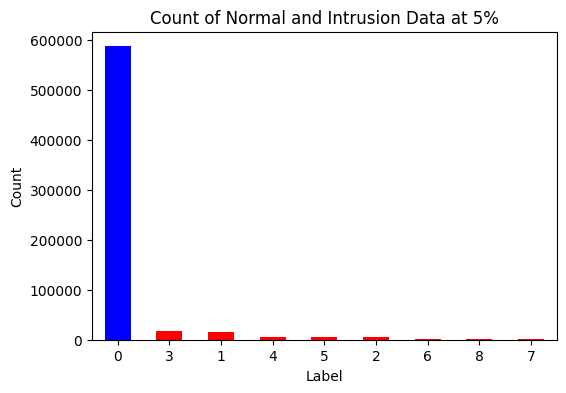

At 5% Intrusion Rate:
Decision Tree Test Accuracy: 0.9911042351576097
Accuracy for class 0: {'precision': 0.9765185328934601, 'recall': 0.9992057188244639, 'f1-score': 0.9877318677004613, 'support': 25180}
Accuracy for class 1: {'precision': 1.0, 'recall': 0.9998571326523323, 'f1-score': 0.999928561223032, 'support': 13999}
Accuracy for class 2: {'precision': 0.9993380406001765, 'recall': 0.9995585963363496, 'f1-score': 0.9994483063003421, 'support': 4531}
Accuracy for class 3: {'precision': 1.0, 'recall': 0.9999272938781445, 'f1-score': 0.9999636456174792, 'support': 13754}
Accuracy for class 4: {'precision': 0.9992156862745099, 'recall': 0.9964802502933124, 'f1-score': 0.9978460935970236, 'support': 5114}
Accuracy for class 5: {'precision': 0.99838023891476, 'recall': 0.9991894630192503, 'f1-score': 0.9987846870569171, 'support': 4935}
Accuracy for class 6: {'precision': 1.0, 'recall': 0.9976415094339622, 'f1-score': 0.998819362455726, 'support': 1696}
Accuracy for class 7: {'precisi

In [ ]:
# 5% Intruders
xti, yti = intrusion_percent(5)
plot_graph(5,xti,yti)
print("At 5% Intrusion Rate:")
run_algos(xti,yti)
print("")

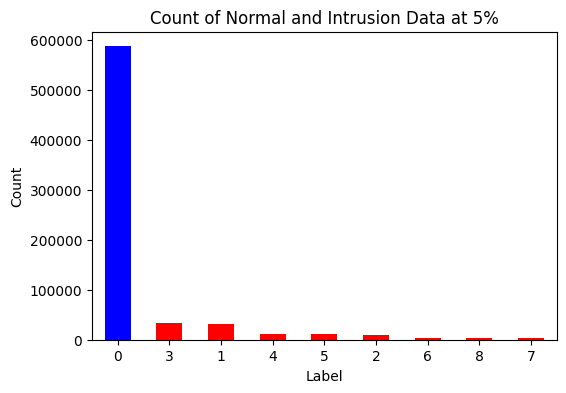

At 10% Intrusion Rate:
Decision Tree Test Accuracy: 0.9939774014421084
Accuracy for class 0: {'precision': 0.9846069484156516, 'recall': 0.9983320095313741, 'f1-score': 0.9914219794521899, 'support': 25180}
Accuracy for class 1: {'precision': 1.0, 'recall': 0.9998571326523323, 'f1-score': 0.999928561223032, 'support': 13999}
Accuracy for class 2: {'precision': 1.0, 'recall': 0.9995585963363496, 'f1-score': 0.9997792494481236, 'support': 4531}
Accuracy for class 3: {'precision': 1.0, 'recall': 0.9999272938781445, 'f1-score': 0.9999636456174792, 'support': 13754}
Accuracy for class 4: {'precision': 0.9998044965786901, 'recall': 1.0, 'f1-score': 0.999902238733014, 'support': 5114}
Accuracy for class 5: {'precision': 1.0, 'recall': 0.9997973657548126, 'f1-score': 0.9998986726112068, 'support': 4935}
Accuracy for class 6: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1696}
Accuracy for class 7: {'precision': 0.9619909502262444, 'recall': 0.7325982081323226, 'f1-score': 0.831

In [ ]:
# 10% Intruders
xti, yti = intrusion_percent(10)
plot_graph(5,xti,yti)
print("At 10% Intrusion Rate:")
run_algos(xti,yti)
print("")

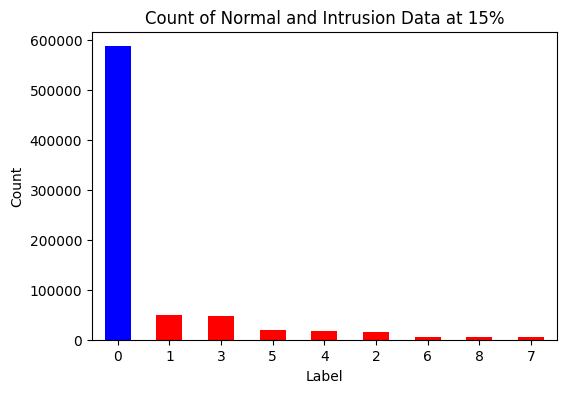

At 15% Intrusion Rate:
Decision Tree Test Accuracy: 0.9948476393071249
Accuracy for class 0: {'precision': 0.987272655851043, 'recall': 0.9981334392374901, 'f1-score': 0.9926733416276636, 'support': 25180}
Accuracy for class 1: {'precision': 1.0, 'recall': 0.9998571326523323, 'f1-score': 0.999928561223032, 'support': 13999}
Accuracy for class 2: {'precision': 1.0, 'recall': 0.9995585963363496, 'f1-score': 0.9997792494481236, 'support': 4531}
Accuracy for class 3: {'precision': 0.9999272938781445, 'recall': 0.9999272938781445, 'f1-score': 0.9999272938781445, 'support': 13754}
Accuracy for class 4: {'precision': 0.9998044965786901, 'recall': 1.0, 'f1-score': 0.999902238733014, 'support': 5114}
Accuracy for class 5: {'precision': 1.0, 'recall': 0.9997973657548126, 'f1-score': 0.9998986726112068, 'support': 4935}
Accuracy for class 6: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1696}
Accuracy for class 7: {'precision': 0.9601018675721562, 'recall': 0.7794624396967609, 'f1

In [ ]:
# 15% Intrusion
xti, yti = intrusion_percent(15)
plot_graph(15,xti,yti)
print("At 15% Intrusion Rate:")
run_algos(xti,yti)
print("")

In [ ]:
df.to_csv("DNP3_IDS_Dataset_preprocessed.csv")

In [ ]:
df.shape

(241311, 98)

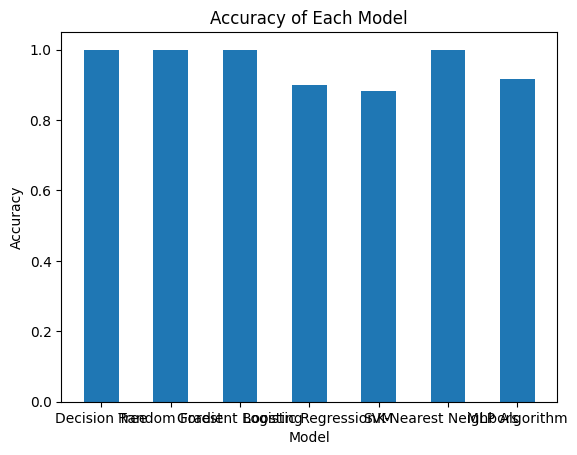

In [ ]:
import matplotlib.pyplot as plt
plt.bar(accuracies.keys(), accuracies.values(), width=0.5, linewidth=0.2)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.show()

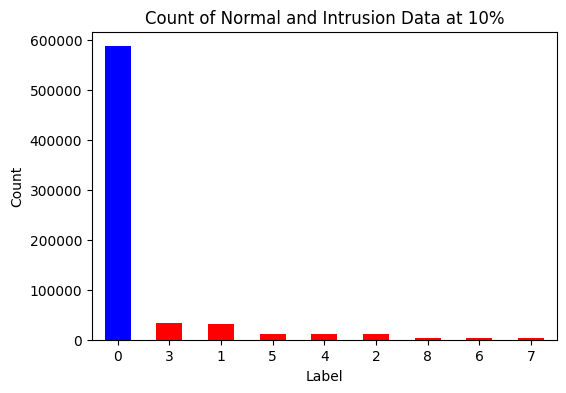

In [ ]:
xti, yti = intrusion_percent(10)
plot_graph(10,xti,yti)